In [97]:
import os
import numpy as np
import seaborn as sns
import pandas as pd
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.python import keras
from tensorflow.python.keras.models import Sequential
from keras.layers import Dense, Conv2D, Activation, MaxPool2D, Flatten, Dropout, BatchNormalization
from keras.optimizers import RMSprop,Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import plot_model
import math
from keras.optimizers import RMSprop

In [98]:
Img_shape = 28
Num_classes = 10
test_size = 0.25
random_state = 1234
No_epochs = 100
Batch_size = 32

In [99]:
train_dataset = pd.read_csv("/content/drive/MyDrive/FashionMNIST/fashion-mnist_train.csv")
test_dataset = pd.read_csv("/content/drive/MyDrive/FashionMNIST/fashion-mnist_test.csv")

In [100]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

In [101]:
def data_preprocessing(raw):
    label = tf.keras.utils.to_categorical(raw.label, 10)
    num_images = raw.shape[0]
    x_as_array = raw.values[:,1:]
    x_shaped_array = x_as_array.reshape(num_images, 28, 28, 1)
    image = x_shaped_array / 255
    return image, label

X, y = data_preprocessing(train_dataset)
X_test, y_test = data_preprocessing(test_dataset)

In [102]:
X_train, X_testt, y_train, y_testt = train_test_split(X, y, train_size=5000, test_size=7200, random_state=random_state)

In [103]:
X_train.shape

(5000, 28, 28, 1)

In [104]:
X_testt.shape

(7200, 28, 28, 1)

In [105]:
# CNN Model
model = Sequential()

model.add(Conv2D(32, 3, padding='same', activation='relu',kernel_initializer='he_normal', input_shape=(28,28, 1)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Conv2D(128, 3, padding='same', activation='relu'))
model.add(Conv2D(128, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.4))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(512, activation='relu'))

model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

In [106]:
# optimizer used = adam
model.compile(optimizer='adam',
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

In [107]:
train_model = model.fit(X_train, y_train,
                  batch_size=Batch_size,
                  epochs=No_epochs,
                  verbose=1)

Epoch 1/100
157/157 [==============================] - 2s 5ms/step - loss: 0.9952 - accuracy: 0.6634
Epoch 2/100
157/157 [==============================] - 1s 7ms/step - loss: 0.7193 - accuracy: 0.7500
Epoch 3/100
157/157 [==============================] - 1s 9ms/step - loss: 0.6280 - accuracy: 0.7644
Epoch 4/100
157/157 [==============================] - 1s 5ms/step - loss: 0.5542 - accuracy: 0.7980
Epoch 5/100
157/157 [==============================] - 1s 5ms/step - loss: 0.5416 - accuracy: 0.8014
Epoch 6/100
157/157 [==============================] - 1s 5ms/step - loss: 0.4762 - accuracy: 0.8184
Epoch 7/100
157/157 [==============================] - 1s 5ms/step - loss: 0.4615 - accuracy: 0.8278
Epoch 8/100
157/157 [==============================] - 1s 5ms/step - loss: 0.4347 - accuracy: 0.8352
Epoch 9/100
157/157 [==============================] - 1s 5ms/step - loss: 0.4394 - accuracy: 0.8336
Epoch 10/100
157/157 [==============================] - 1s 5ms/step - loss: 0.4296 - accura

In [108]:
def salt_pepper(test_sequences,prob,salt=0,pepper=1):
  sampled_images = test_sequences
  for i in range(7200):
    for y in range(28):
      for x in range(28):
        r = np.random.random() 
        if r < prob:
          sampled_images[i][y][x] = salt
        elif r > 1-prob:
          sampled_images[i][y][x] = pepper
  return sampled_images

In [109]:
for i in range(1,6,1):
  noise = salt_pepper(X_testt, i/100)

In [110]:
noise__ = noise.reshape(X_testt.shape[0], 28, 28)

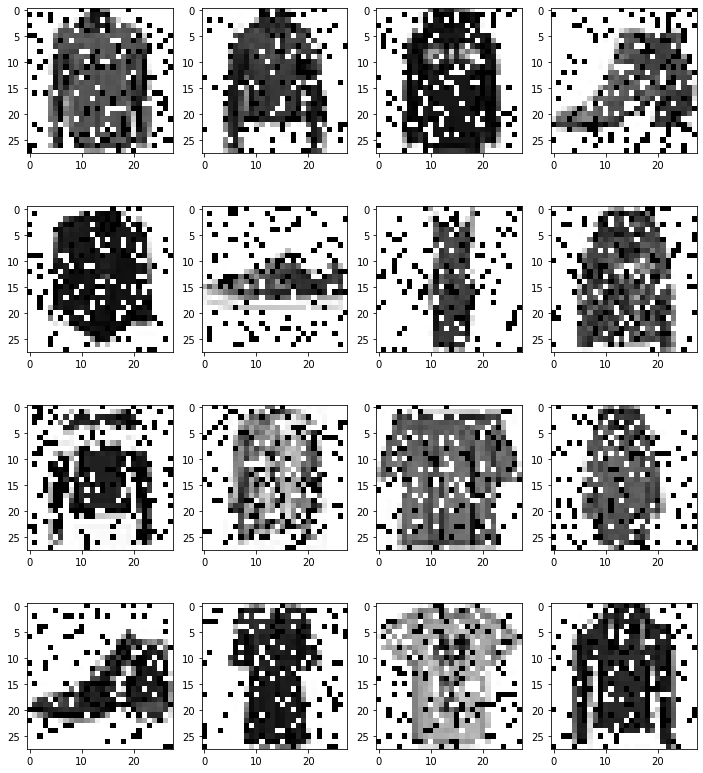

In [111]:
fig, axis = plt.subplots(4, 4, figsize=(12, 14))
for i, ax in enumerate(axis.flat):
    ax.imshow(noise__[i], cmap='binary')

In [112]:
score = model.evaluate(X_testt, y_testt, steps=math.ceil(7200/32))
# checking the test loss and test accuracy
print('Test loss:', score[0])
print('Test accuracy:', score[1])

225/225 [==============================] - 1s 3ms/step - loss: 8.9404 - accuracy: 0.1838
Test loss: 8.940367698669434
Test accuracy: 0.1837500035762787


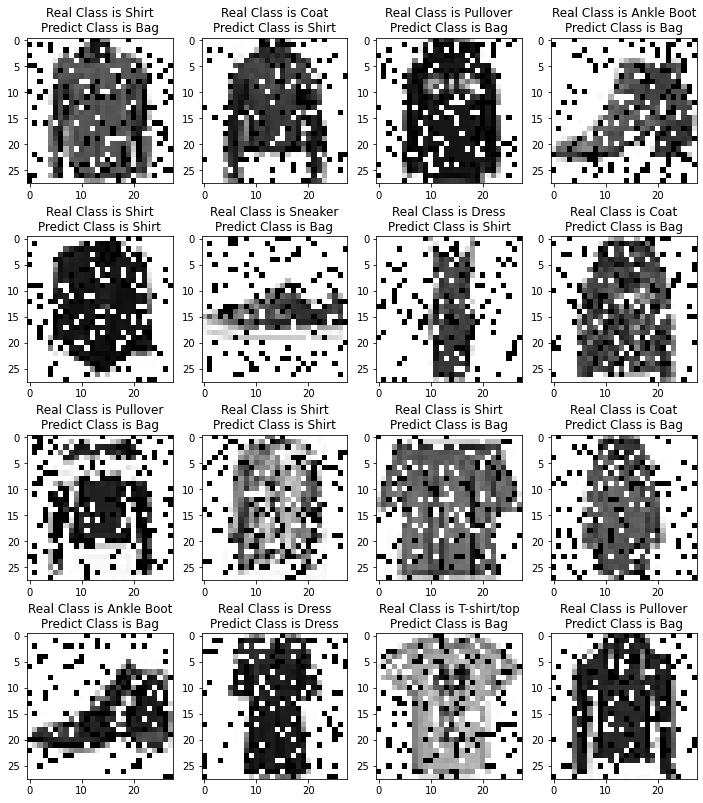

In [113]:
labels = {0 : "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
          5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}

y_pred = model.predict(X_testt)
X_test__ = X_testt.reshape(X_testt.shape[0], 28, 28)

fig, axis = plt.subplots(4, 4, figsize=(12, 14))
for i, ax in enumerate(axis.flat):
    ax.imshow(X_test__[i], cmap='binary')
    ax.set(title = f"Real Class is {labels[y_testt[i].argmax()]}\nPredict Class is {labels[y_pred[i].argmax()]}");